# Exploratory Analysis of  UVA Flow data

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read in data as csv and set columns

data = pd.read_csv('Data/ExtGammaFlows.txt', sep = ',')
data2 = pd.read_csv('Data/ExtGammaFlows2.txt', sep = ',')


data.rename(columns = {'#srcAddr':'srcAddr'},inplace=True)
data2.rename(columns = {'#srcAddr':'srcAddr'},inplace=True)


data['id'] = data.index
data2['id'] = data2.index


cols = list(data)
cols = cols[-1:] + cols[:-1]
data=data[cols]
data2=data2[cols]

data.drop(['sas', 'das','smk','dmk'], axis=1, inplace=True)
data2.drop(['sas', 'das','smk','dmk'], axis=1, inplace=True)




In [4]:
#data.head()
data2.head()

,id,srcAddr,dstAddr,srcPort,dstPort,prot,bytes,pkts,dur,rate,firstTime,lastTime,maxrate
0,0,75.102.143.245,128.143.2.7,53,47759,17,168,2,0.000,0.00,1.486835e+09,1.486835e+09,0.0
1,1,128.143.2.7,104.156.84.32,44985,53,17,160,2,0.000,0.00,1.486835e+09,1.486835e+09,0.0
2,2,114.33.89.12,128.143.7.14,22929,23,6,80,2,0.000,0.00,1.486833e+09,1.486833e+09,0.0
3,3,23.253.131.243,128.143.3.7,53,44564,17,256,2,0.000,0.00,1.486833e+09,1.486833e+09,0.0
4,4,174.218.129.232,128.143.8.199,5040,80,6,3394,52,0.212,128075.47,1.486833e+09,1.486833e+09,128075.0


# Generate Frequency Statistics for the first and second sample



In [5]:
#Count
print("Count: " + str(data.id.count()))
#unique source ip
print("Unique Source IPs: " + str(len(data.srcAddr.unique())))
#unique destination ip
print("Unique Destination IPs: " + str(len(data.dstAddr.unique())))
#unique destination ports
print("Unique Destination Ports: " + str(len(data.dstPort.unique())))
#unique Source ports
print("Unique Source Ports: " + str(len(data.srcPort.unique())))
print("Unique Protocols: " + str(len(data.prot.unique())))
print("Average Duration: "+ str(round(data.dur.mean(),2)) + " Milliseconds")
print("Average Packets(input) : "+ str(round(data.pkts.mean())))
print("Average Rate: " + str(round(data.rate.mean(),2))+ " Bits per Second")

#print("Standard Deviation of Rate: " + str(round(data.rate.std(),2))+ " Bits per Second")
#print("Max Rate: " + str(round(data.rate.max(),5))+ " Bits per Second")

round(data[['bytes','pkts', 'dur','rate']].describe(), 3)

Count: 3420090
Unique Source IPs: 699594
Unique Destination IPs: 294710
Unique Destination Ports: 65518
Unique Source Ports: 65535
Unique Protocols: 4
Average Duration: 2.16 Milliseconds
Average Packets(input) : 19
Average Rate: 57090.86 Bits per Second


,bytes,pkts,dur,rate
count,3.420090e+06,3420090.000,3420090.000,3.420090e+06
mean,1.079863e+04,18.839,2.158,5.709086e+04
std,1.309056e+06,1187.616,31.221,1.673029e+06
min,5.600000e+01,2.000,0.000,0.000000e+00
25%,1.340000e+02,2.000,0.000,0.000000e+00
50%,1.660000e+02,2.000,0.000,0.000000e+00
75%,5.880000e+02,6.000,0.093,1.055270e+03
max,1.369529e+09,913036.000,2792.115,8.972810e+08


In [6]:
#Count
print("Count: " + str(data2.id.count()))
#unique source ip
print("Unique Source IPs: " + str(len(data2.srcAddr.unique())))
#unique destination ip
print("Unique Destination IPs: " + str(len(data2.dstAddr.unique())))
#unique destination ports
print("Unique Destination Ports: " + str(len(data2.dstPort.unique())))
#unique Source ports
print("Unique Source Ports: " + str(len(data2.srcPort.unique())))
print("Unique Protocols: " + str(len(data2.prot.unique())))
print("Average Duration: "+ str(round(data2.dur.mean(),2)) + " Milliseconds")
print("Average Packets(input) : "+ str(round(data2.pkts.mean())))
print("Average Rate: " + str(round(data2.rate.mean(),2))+ " Bits per Second")

#print("Standard Deviation of Rate: " + str(round(data2.rate.std(),2))+ " Bits per Second")
#print("Max Rate: " + str(round(data2.rate.max(),5))+ " Bits per Second")

round(data2[['bytes','pkts', 'dur','rate']].describe(), 3)

Count: 3161536
Unique Source IPs: 245520
Unique Destination IPs: 103336
Unique Destination Ports: 64978
Unique Source Ports: 65500
Unique Protocols: 4
Average Duration: 2.68 Milliseconds
Average Packets(input) : 43
Average Rate: 101544.97 Bits per Second


,bytes,pkts,dur,rate
count,3.161536e+06,3.161536e+06,3161536.000,3.161536e+06
mean,3.290447e+04,4.257700e+01,2.684,1.015450e+05
std,1.572215e+07,1.199617e+04,31.316,2.064402e+06
min,5.600000e+01,2.000000e+00,0.000,0.000000e+00
25%,1.480000e+02,2.000000e+00,0.000,0.000000e+00
50%,2.580000e+02,2.000000e+00,0.000,0.000000e+00
75%,1.622000e+03,1.400000e+01,0.485,7.923968e+03
max,2.766432e+10,1.847074e+07,2646.075,9.709420e+08


In [7]:
#Top 10 Most Frequent Destination and Source ports
#freqDes_ports = data['dstPort'].value_counts()
print("First sample top 10 Frequent Destination ports\n"+  str(data['dstPort'].value_counts().head(10))+"\n")
print("Second sample top 10 Frequent Destination ports\n" +  str(data2['dstPort'].value_counts().head(10))+"\n")

print("First sample top 10 Source Destination ports\n" +  str(data['srcPort'].value_counts().head(10)))
print("Second sample top 10 Source Destination ports\n" +  str(data2['srcPort'].value_counts().head(10)))

#53 - DNS
#23 - Telnet is the primary method used to manage network devices at the command level. 
#443 - Hypertext Transfer Protocol over SSL/TL
#80 - Hypertext Transfer Protocol
#25 - SMTP
#5358 Web Services for Devices Secured port - http://www.speedguide.net/port.php?port=5358
#22 - Secure Shell (SSH)


First sample top 10 Frequent Destination ports
53      1046314
23       230758
443      206383
80       135076
5358      76998
22        76245
25        57012
1433      49125
7547      34107
389       26228
Name: dstPort, dtype: int64

Second sample top 10 Frequent Destination ports
53      668380
443     327830
23      221905
80      169161
5358     74576
22       69570
25       63721
389      39886
7547     36261
2323     14474
Name: dstPort, dtype: int64

First sample top 10 Source Destination ports
53       733708
443      214314
22       105289
80        96390
25        35427
23        28027
58899     20934
6000      17159
50748     13288
42607     12999
Name: srcPort, dtype: int64
Second sample top 10 Source Destination ports
53       601607
443      331805
80       121939
22        82113
25        53378
23        25609
58899     21274
54738     13715
52736     12241
57309     11916
Name: srcPort, dtype: int64


In [8]:
#Look at most frequent ip address used
#data.dstAddr.value_counts()
#data.srcAddr.value_counts()

# 2) Next take a look at specific IP and Port Combination
    pages.shanti.virginia.edu - 128.143.21.137 & Port 443
    collab.itc.virgina.edu - 128.143.2.75 & Port 443
    ece.virginia.edu -  128.143.11.107 & Port 80
      


In [9]:
#Most frequent Port us4ed
#test_sample1 = data[(((data.srcAddr == '128.143.21.137')| (data.dstAddr =='128.143.21.137')))] 

#443     1572
#80      1306
#23        23
#1433       5
#7553       4
#Name: srcPort, dtype: int64
#443      2016
#80       1846
#23         31
#58899       4
#1433        4
#Name: dstPort, dtype: int64

test_sample1_pages = data[(((data.srcAddr == '128.143.21.137')| (data.dstAddr =='128.143.21.137')) & (data.dstPort == 443))]
test_sample2_pages = data2[(((data2.srcAddr == '128.143.21.137')| (data2.dstAddr =='128.143.21.137')) & (data2.dstPort == 443))]



#test_sample1_ece = data[(((data.srcAddr == '128.143.11.107')| (data.dstAddr =='128.143.11.107')))]
#print(str(test_sample1_ece.srcPort.value_counts().head()))
#print(str(test_sample1_ece.dstPort.value_counts().head()))

#80      94
#443      7
#123      2
#2479     2
#6000     2
#Name: srcPort, dtype: int64
#80      159
#23       15
#5358      7
#1433      3
#2699      2
#Name: dstPort, dtype: int64

test_sample1_ece = data[(((data.srcAddr == '128.143.11.107')| (data.dstAddr =='128.143.11.107')) & (data.dstPort == 80))]
test_sample2_ece = data2[(((data2.srcAddr == '128.143.11.107')| (data2.dstAddr =='128.143.11.107')) & (data2.dstPort == 80))]

#test_sample1_colla = data[(((data.srcAddr == '128.143.2.75')| (data.dstAddr =='128.143.2.75')))] 
#print(str(test_sample1_colla.srcPort.value_counts().head()))
#print(str(test_sample1_colla.dstPort.value_counts().head()))
#443      37414
#55699       11
#50178        9
#57875        9
#60588        9
#Name: srcPort, dtype: int64
#443      42633
#23          13
#80          11
#57875       10
#61847        9
#Name: dstPort, dtype: int64


test_sample1_colla = data[(((data.srcAddr == '128.143.2.75')| (data.dstAddr =='128.143.2.75')) & (data.dstPort == 443))]
test_sample2_colla = data2[(((data2.srcAddr == '128.143.2.75')| (data2.dstAddr =='128.143.2.75')) & (data2.dstPort == 443))]


## Use boxplots to compare samples of distribution of 3 variables  - Packets, Bytes, Duration

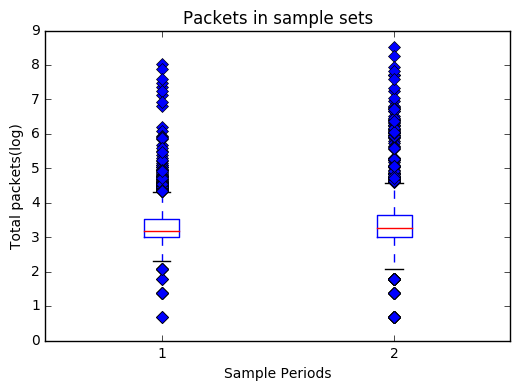

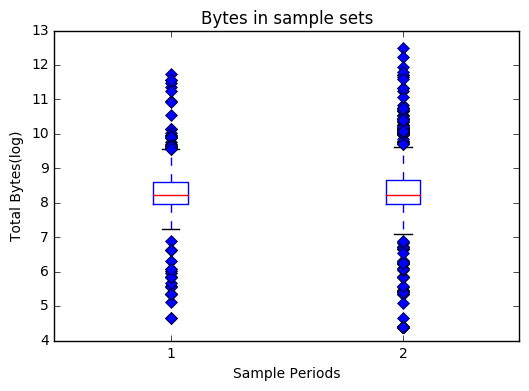

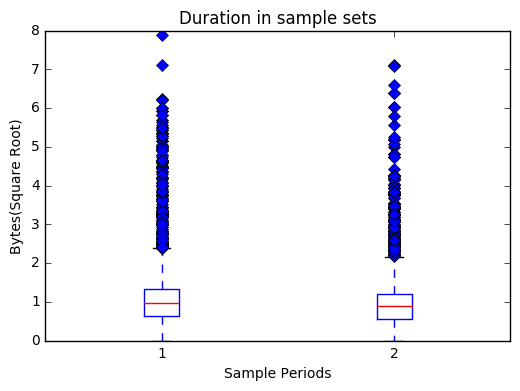

In [10]:
test_443_pkts_pages =  np.log(test_sample1_pages.pkts)
test_443_bytes_pages = np.log(test_sample1_pages.bytes)
test_443_dura_pages = np.sqrt(test_sample1_pages.dur)

test2_443_pkts_pages =  np.log(test_sample2_pages.pkts)
test2_443_bytes_pages = np.log(test_sample2_pages.bytes)
test2_443_dura_pages = np.sqrt(test_sample2_pages.dur)


Time = ['1','2']


fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
ax1 = fig1.add_subplot(111)
bp = ax1.boxplot([test_443_pkts_pages,test2_443_pkts_pages], 0, 'gD') 
ax2 = fig2.add_subplot(111)
bp2 = ax2.boxplot([test_443_bytes_pages,test2_443_bytes_pages], 0, 'gD') 
ax3 = fig3.add_subplot(111)
bp3 = ax3.boxplot([test_443_dura_pages,test2_443_dura_pages], 0, 'gD') 

ax1.set_axisbelow(True)
ax1.set_title('Packets in sample sets')
ax1.set_xlabel('Sample Periods')
ax1.set_ylabel('Total packets(log)')
xtickNames = plt.setp(ax1, xticklabels= Time)

ax2.set_axisbelow(True)
ax2.set_title('Bytes in sample sets')
ax2.set_xlabel('Sample Periods')
ax2.set_ylabel('Total Bytes(log)')

ax3.set_axisbelow(True)
ax3.set_title('Duration in sample sets')
ax3.set_xlabel('Sample Periods')
ax3.set_ylabel('Bytes(Square Root)')
plt.show()

#plt.savefig('Dist_2.jpg')






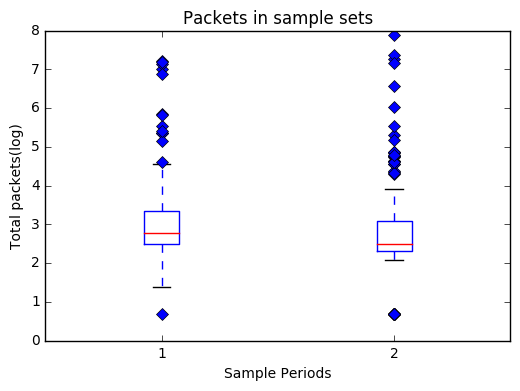

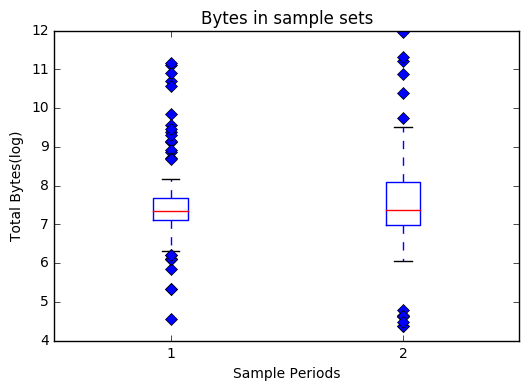

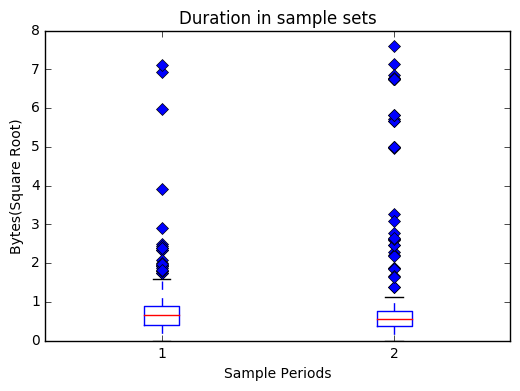

In [11]:
test_80_pkts_ece =  np.log(test_sample1_ece.pkts)
test_80_bytes_ece = np.log(test_sample1_ece.bytes)
test_80_dura_ece = np.sqrt(test_sample1_ece.dur)

test2_80_pkts_ece =  np.log(test_sample2_ece.pkts)
test2_80_bytes_ece = np.log(test_sample2_ece.bytes)
test2_80_dura_ece = np.sqrt(test_sample2_ece.dur)


Time = ['1','2']


fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
ax1 = fig1.add_subplot(111)
bp = ax1.boxplot([test_80_pkts_ece,test2_80_pkts_ece], 0, 'gD') 
ax2 = fig2.add_subplot(111)
bp2 = ax2.boxplot([test_80_bytes_ece,test2_80_bytes_ece], 0, 'gD') 
ax3 = fig3.add_subplot(111)
bp3 = ax3.boxplot([test_80_dura_ece,test2_80_dura_ece], 0, 'gD') 

ax1.set_axisbelow(True)
ax1.set_title('Packets in sample sets')
ax1.set_xlabel('Sample Periods')
ax1.set_ylabel('Total packets(log)')
xtickNames = plt.setp(ax1, xticklabels= Time)

ax2.set_axisbelow(True)
ax2.set_title('Bytes in sample sets')
ax2.set_xlabel('Sample Periods')
ax2.set_ylabel('Total Bytes(log)')

ax3.set_axisbelow(True)
ax3.set_title('Duration in sample sets')
ax3.set_xlabel('Sample Periods')
ax3.set_ylabel('Bytes(Square Root)')
plt.show()



## Run Isolation forest on the three IP-Port Combo

### Pages 

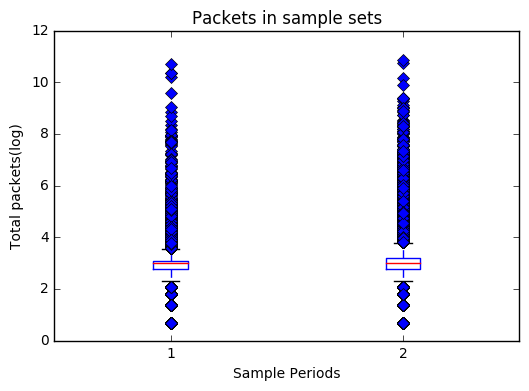

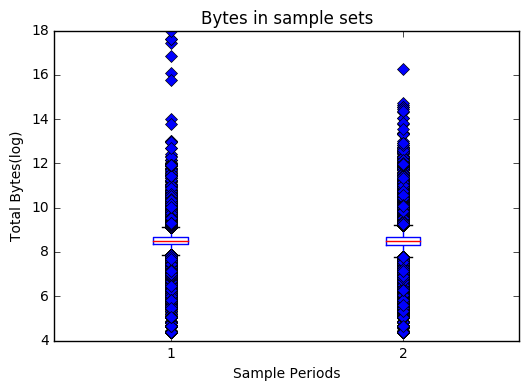

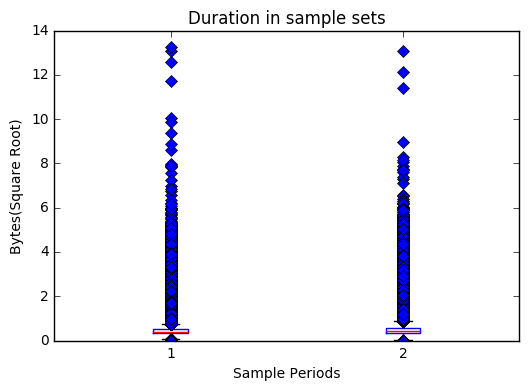

In [12]:
test_443_pkts_colla =  np.log(test_sample1_colla.pkts)
test_443_bytes_colla = np.log(test_sample1_colla.bytes)
test_443_dura_colla = np.sqrt(test_sample1_colla.dur)

test2_443_pkts_colla =  np.log(test_sample2_colla.pkts)
test2_443_bytes_colla = np.log(test_sample2_colla.bytes)
test2_443_dura_colla = np.sqrt(test_sample2_colla.dur)


Time = ['1','2']


fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
ax1 = fig1.add_subplot(111)
bp = ax1.boxplot([test_443_pkts_colla,test2_443_pkts_colla], 0, 'gD') 
ax2 = fig2.add_subplot(111)
bp2 = ax2.boxplot([test_443_bytes_colla,test2_443_bytes_colla], 0, 'gD') 
ax3 = fig3.add_subplot(111)
bp3 = ax3.boxplot([test_443_dura_colla,test2_443_dura_colla], 0, 'gD') 

ax1.set_axisbelow(True)
ax1.set_title('Packets in sample sets')
ax1.set_xlabel('Sample Periods')
ax1.set_ylabel('Total packets(log)')
xtickNames = plt.setp(ax1, xticklabels= Time)

ax2.set_axisbelow(True)
ax2.set_title('Bytes in sample sets')
ax2.set_xlabel('Sample Periods')
ax2.set_ylabel('Total Bytes(log)')

ax3.set_axisbelow(True)
ax3.set_title('Duration in sample sets')
ax3.set_xlabel('Sample Periods')
ax3.set_ylabel('Bytes(Square Root)')
plt.show()




In [185]:
from sklearn.ensemble import IsolationForest
train = test_sample1_pages[['bytes','pkts','dur','rate']]
test = test_sample2_pages[['bytes','pkts','dur','rate']]

clf = IsolationForest(max_samples=1000, contamination=0.05,random_state= 5, bootstrap=False)
clf.fit(train)

#contamination : float in (0., 0.5), optional (default=0.1)
#The amount of contamination of the data set, i.e. the proportion of outliers in the data set. 
#Used when fitting to define the threshold on the decision function.


IsolationForest(bootstrap=False, contamination=0.05, max_features=1.0,
        max_samples=1000, n_estimators=100, n_jobs=1, random_state=5,
        verbose=0)

In [188]:
columns = ['Inlier']
y_pred_test = pd.DataFrame(clf.predict(test), columns = columns)
y_pred_test.set_index(test_sample2_pages.index, inplace = True)
df = ['score']


scores = pd.DataFrame(clf.decision_function(test), columns = df)
scores.set_index(test_sample2_pages.index, inplace = True )


frames = [scores,y_pred_test]
x = pd.concat(frames, axis = 1)


x2_pages = pd.merge(test_sample2_pages, x, right_index= True, left_index=True, how='right')
#outlier = x2_pages[x2_pages.Inlier == -1]
outlier.sort_index(by='score' ) 



/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/ipykernel/__main__.py:17: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,id,srcAddr,dstAddr,srcPort,dstPort,prot,bytes,pkts,dur,rate,firstTime,lastTime,maxrate,score,Inlier
15488,15488,76.1.131.37,128.143.21.137,34060,443,6,269578,5092,40.840,52806.66,1.486833e+09,1.486833e+09,52806.0,-0.307759,-1
1548270,1548270,76.1.131.37,128.143.21.137,46195,443,6,207072,3890,36.213,45745.34,1.486833e+09,1.486833e+09,43599.0,-0.300027,-1
486052,486052,66.249.64.164,128.143.21.137,34611,443,6,116288,2206,2.803,331895.83,1.486834e+09,1.486834e+09,331895.0,-0.286270,-1
2695319,2695319,76.1.131.37,128.143.21.137,39543,443,6,151640,2824,23.186,52321.23,1.486833e+09,1.486833e+09,52321.0,-0.284605,-1
2779063,2779063,76.1.131.37,128.143.21.137,46508,443,6,133856,2482,18.011,59455.22,1.486833e+09,1.486833e+09,59455.0,-0.281484,-1
2016315,2016315,76.1.131.37,128.143.21.137,39303,443,6,121482,2244,17.203,56493.40,1.486833e+09,1.486833e+09,56493.0,-0.281067,-1
1702297,1702297,76.1.131.37,128.143.21.137,47979,443,6,121688,2248,17.624,55237.40,1.486833e+09,1.486833e+09,55237.0,-0.280841,-1
530436,530436,73.148.113.56,128.143.21.137,64036,443,6,121630,130,0.742,1311374.66,1.486834e+09,1.486834e+09,1311374.0,-0.280828,-1
2847282,2847282,76.1.131.37,128.143.21.137,33080,443,6,109210,2008,14.155,61722.36,1.486833e+09,1.486833e+09,61722.0,-0.267180,-1
2407122,2407122,73.148.113.56,128.143.21.137,64037,443,6,83560,74,0.513,1303079.89,1.486834e+09,1.486834e+09,1300584.0,-0.266174,-1


 ## ECE

In [15]:
from sklearn.ensemble import IsolationForest
train_ece = test_sample1_ece[['bytes','pkts','dur','rate']]
test_ece = test_sample2_ece[['bytes','pkts','dur','rate']]

clf = IsolationForest(max_samples=1000, contamination=0.05,random_state= 5, bootstrap=False)
clf.fit(train_ece)

/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:184: UserWarning: max_samples (1000) is greater than the total number of samples (159). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


IsolationForest(bootstrap=False, contamination=0.05, max_features=1.0,
        max_samples=1000, n_estimators=100, n_jobs=1, random_state=5,
        verbose=0)

In [189]:
columns = ['Inlier']
y_pred_test_ece = pd.DataFrame(clf.predict(test_ece), columns = columns)
y_pred_test_ece.set_index(test_sample2_ece.index, inplace = True)
df = ['score']


scores_ece = pd.DataFrame(clf.decision_function(test_ece), columns = df)
scores_ece.set_index(test_sample2_ece.index, inplace = True )


frames = [scores_ece,y_pred_test_ece]
x_ece = pd.concat(frames, axis = 1)


x2_ece = pd.merge(test_sample2_ece, x_ece, right_index= True, left_index=True, how='right')
outlier = x2_ece[x2_ece.Inlier == -1]
outlier.sort_index(by='score' ) 



/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/ipykernel/__main__.py:17: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,id,srcAddr,dstAddr,srcPort,dstPort,prot,bytes,pkts,dur,rate,firstTime,lastTime,maxrate,score,Inlier
2188945,2188945,66.249.73.212,128.143.11.107,34182,80,6,74874,1430,0.536,1117522.39,1.486834e+09,1.486834e+09,1117522.0,-0.285850,-1
2013850,2013850,165.117.232.82,128.143.11.107,10400,80,6,156882,2684,6.132,204673.19,1.486833e+09,1.486833e+09,204673.0,-0.284173,-1
3064182,3064182,64.233.173.157,128.143.11.107,49649,80,6,82524,1566,2.700,244515.56,1.486833e+09,1.486833e+09,244515.0,-0.256999,-1
667673,667673,41.70.157.241,128.143.11.107,56678,80,6,32590,712,57.747,4514.87,1.486832e+09,1.486832e+09,4067.0,-0.246731,-1
3115115,3115115,24.158.122.59,128.143.11.107,52731,80,6,52612,1282,1.136,370507.04,1.486833e+09,1.486833e+09,370507.0,-0.242048,-1
1967969,1967969,89.189.91.106,128.143.11.107,57387,80,6,7886,118,46.864,1346.19,1.486833e+09,1.486833e+09,1321.0,-0.155933,-1
72468,72468,76.1.142.40,128.143.11.107,54063,80,6,1028,22,50.751,162.05,1.486835e+09,1.486835e+09,117.0,-0.155307,-1
2670835,2670835,76.1.142.40,128.143.11.107,54064,80,6,924,20,45.857,161.20,1.486835e+09,1.486835e+09,118.0,-0.133936,-1
2219096,2219096,71.206.132.182,128.143.11.107,58619,80,6,738,16,45.397,130.05,1.486833e+09,1.486833e+09,115.0,-0.131528,-1
2148561,2148561,71.206.132.182,128.143.11.107,58621,80,6,738,16,45.393,130.06,1.486833e+09,1.486833e+09,115.0,-0.131528,-1


### Collab

In [191]:
from sklearn.ensemble import IsolationForest
train_colla = test_sample1_colla[['bytes','pkts','dur','rate']]
test_colla = test_sample2_colla[['bytes','pkts','dur','rate']]
#train_colla = test_sample1_colla[['bytes','pkts']]
#test_colla = test_sample2_colla[['bytes','pkts']]

clf = IsolationForest(max_samples=1000, contamination=0.05,random_state= 5, bootstrap=False)
clf.fit(train_colla)

IsolationForest(bootstrap=False, contamination=0.05, max_features=1.0,
        max_samples=1000, n_estimators=100, n_jobs=1, random_state=5,
        verbose=0)

In [193]:
columns = ['Inlier']

y_pred_train_colla = pd.DataFrame(clf.predict(train_colla), columns = columns)
y_pred_test_colla = pd.DataFrame(clf.predict(test_colla), columns = columns)

y_pred_test_colla.set_index(test_sample2_colla.index, inplace = True)
df = ['score']


scores_colla = pd.DataFrame(clf.decision_function(test_colla), columns = df)
scores_colla.set_index(test_sample2_colla.index, inplace = True )


frames = [scores_colla,y_pred_test_colla]
x_colla = pd.concat(frames, axis = 1)


x2_colla = pd.merge(test_sample2_colla, x_colla, right_index= True, left_index=True, how='right')
x2_colla
#outlier = x2_colla[x2_colla.Inlier == -1]
#outlier.sort_index(by='score' ) 
x2_colla.sort_index(by='score' ) 




/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/ipykernel/__main__.py:22: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,id,srcAddr,dstAddr,srcPort,dstPort,prot,bytes,pkts,dur,rate,firstTime,lastTime,maxrate,score,Inlier
1218493,1218493,184.6.12.245,128.143.2.75,20099,443,6,11711120,8276,65.127,1438557.89,1.486832e+09,1.486832e+09,1434746.0,-0.349613,-1
1091563,1091563,8.37.205.47,128.143.2.75,51307,443,6,2434770,46756,129.630,150259.66,1.486833e+09,1.486833e+09,133031.0,-0.341930,-1
2834215,2834215,50.240.91.229,128.143.2.75,64808,443,6,780582,19418,147.070,42460.43,1.486833e+09,1.486833e+09,38856.0,-0.340132,-1
2571773,2571773,108.39.115.44,128.143.2.75,64120,443,6,1025046,25508,66.507,123300.83,1.486832e+09,1.486832e+09,129185.0,-0.338787,-1
373168,373168,70.199.192.201,128.143.2.75,2738,443,6,635482,12080,58.015,87630.03,1.486834e+09,1.486834e+09,92715.0,-0.335655,-1
1490385,1490385,72.86.49.10,128.143.2.75,1028,443,6,2104914,52472,53.006,317686.90,1.486833e+09,1.486833e+09,319937.0,-0.335655,-1
2455002,2455002,71.207.150.135,128.143.2.75,60377,443,6,330614,8150,68.629,38539.28,1.486834e+09,1.486834e+09,39536.0,-0.333871,-1
105909,105909,69.255.196.36,128.143.2.75,54013,443,6,223282,3984,170.918,10450.95,1.486833e+09,1.486833e+09,10922.0,-0.332535,-1
2381446,2381446,8.37.205.47,128.143.2.75,51306,443,6,630106,12044,32.204,156528.63,1.486833e+09,1.486833e+09,156200.0,-0.332090,-1
1299077,1299077,172.56.28.175,128.143.2.75,25330,443,6,373770,9178,59.136,50564.12,1.486835e+09,1.486835e+09,47485.0,-0.331202,-1


In [196]:
print("Test set size:")
print(str(len(x2_colla)))
print(str(len(x2_ece)))
print(str(len(x2_pages)) + "\n")


print("Percentage of 'Predicted' Outliers for test set")
print( 'collab.itc.virgina.edu: 128.143.2.75      -  '+ str(round(len(x2_colla[x2_colla.Inlier == -1])/ len(x2_colla[x2_colla.Inlier == 1]),3)))
print("ece.virginia.edu:128.143.11.107           -  "+ str(round(len(x2_ece[x2_ece.Inlier == -1])/ len(x2_ece[x2_ece.Inlier == 1]),3)))
print( 'pages.shanti.virginia.edu:128.143.21.137  -  '+str(round(len(x2_pages[x2_pages.Inlier == -1])/ len(x2_pages[x2_pages.Inlier == 1]),3)))



Test set size:
77010
204
2119

Percentage of 'Predicted' Outliers for test set
collab.itc.virgina.edu: 128.143.2.75      -  0.078
ece.virginia.edu:128.143.11.107           -  0.267
pages.shanti.virginia.edu:128.143.21.137  -  0.081


In [197]:
print("Collab Average inlier score: " + str(x2_colla[x2_colla.Inlier == 1].score.mean()))
print("ECE Average inlier score: " + str(x2_ece[x2_ece.Inlier == 1].score.mean()))
print("Pages Average inlier score: " + str(x2_pages[x2_pages.Inlier == 1].score.mean())+ "\n")



print("Collab Average anomalous score: " + str(x2_colla[x2_colla.Inlier == -1].score.mean()))
print("ECE Average anomalous score: " + str(x2_ece[x2_ece.Inlier == -1].score.mean()))
print("Pages Average anomalous score: " + str(x2_pages[x2_pages.Inlier == -1].score.mean()))



Collab Average inlier score: 0.1327383520841674
ECE Average inlier score: 0.09625670232803082
Pages Average inlier score: 0.12406164875343144

Collab Average anomalous score: -0.06432279591077882
ECE Average anomalous score: -0.08444576019903835
Pages Average anomalous score: -0.0774394388222587


In [22]:
#inlier = x2_colla[x2_colla.Pred_Anom == 1 ]
#outlier = x2_colla[x2_colla.Pred_Anom == -1 ]
# plot the line, the samples, and the nearest vectors to the plane
#xx, yy = np.meshgrid(np.linspace(0, 20, 10), np.linspace(0, 20, 10))
#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#Z = Z.reshape(xx.shape)

#plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

#b1 = plt.scatter(np.log(train_colla['bytes']), np.log(train_colla['pkts']), c='white')
#b2 = plt.scatter(np.log(test_colla['bytes']), np.log(test_colla['pkts']), c='green')
#b3 =  plt.scatter(np.log(inlier['bytes']), np.log(inlier['pkts']), c='blue')
#b4 =  plt.scatter(np.log(outlier['bytes']), np.log(outlier['pkts']), c='red')




In [23]:
import seaborn as sns

/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


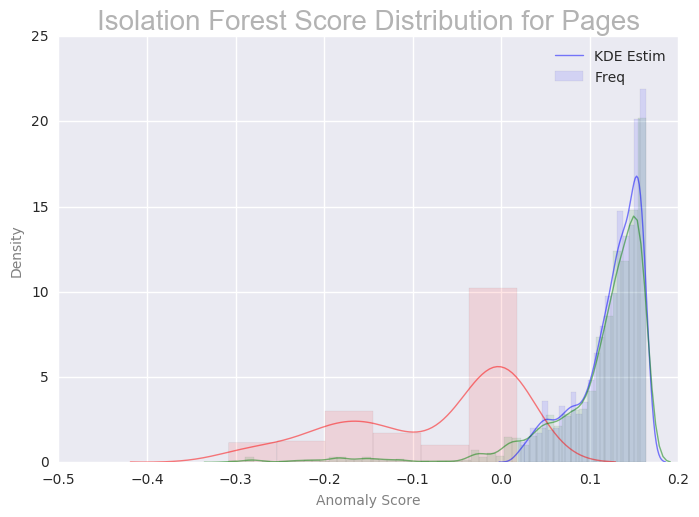

In [24]:
inlier_pages = x2_pages[x2_pages.Pred_Anom == 1]
outlier_pages= x2_pages[x2_pages.Pred_Anom == -1]

aa = sns.distplot(inlier_pages.score, kde_kws={"color":"b","lw":1,"label":"KDE Estim","alpha":0.5},
            hist_kws={"color":"b","alpha":0.1,"label":"Freq"})

ab= sns.distplot(outlier_pages.score,kde_kws={"color":"r","lw":1,"alpha":0.5},
            hist_kws={"color":"r","alpha":0.1})
ac= sns.distplot(x2_pages.score, kde_kws={"color":"g","lw":1,"alpha":0.5},
            hist_kws={"color":"g","alpha":0.1})

aa.axes.set_title('Isolation Forest Score Distribution for Pages', fontsize=20,color="black",alpha=0.3)
# Set the xlabel of the graph from here
aa.set_xlabel("Anomaly Score",size = 10,color="black",alpha=0.5)
# Set the ylabel of the graph from here
aa.set_ylabel("Density",size = 10,color="black",alpha=0.5)



In [25]:
print ("Pages(Green): inliers: "+str(len(x2_pages[x2_pages.Pred_Anom == 1])))
print ("Pages(Blue): Outliers: "+str(len(x2_pages[x2_pages.Pred_Anom == -1])))



Pages(Green): inliers: 1960
Pages(Blue): Outliers: 159


/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


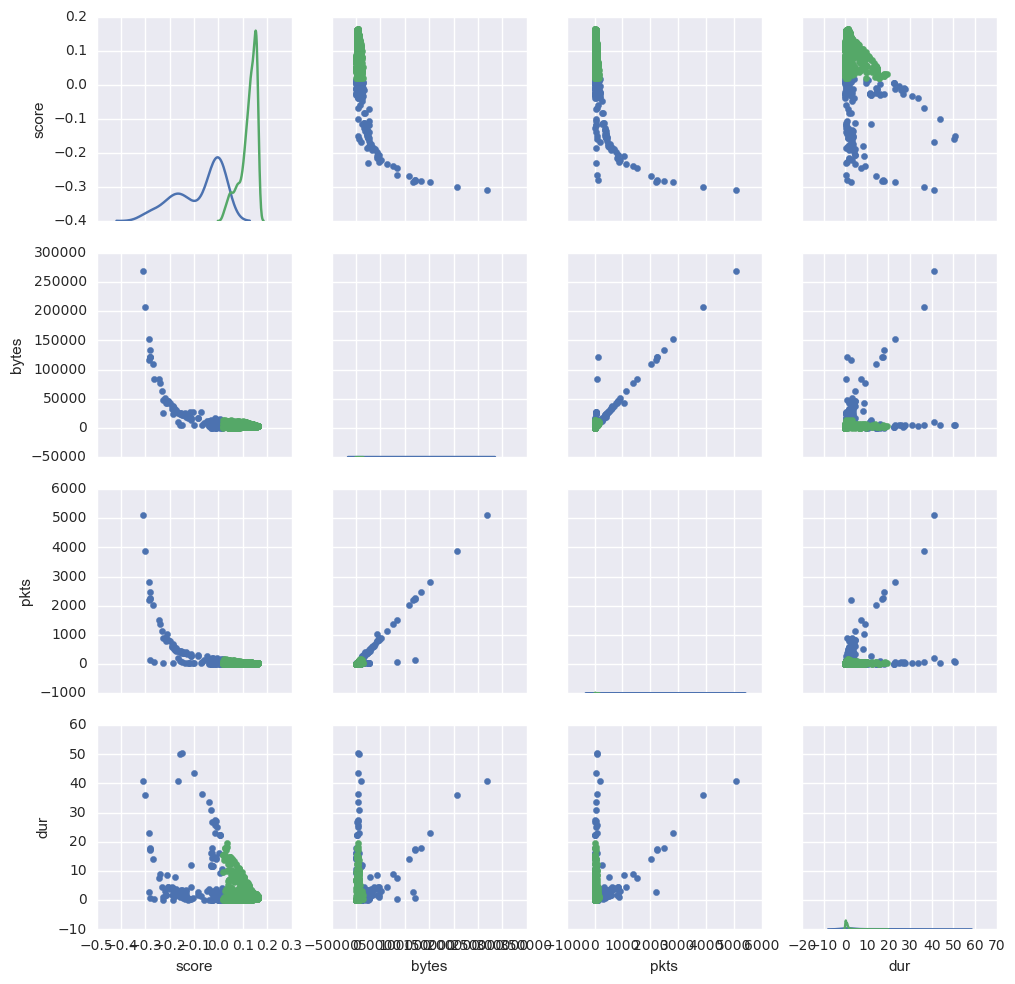

In [26]:
g = sns.PairGrid(x2_pages,vars=["score", "bytes","pkts","dur"], hue="Pred_Anom")
g = g.map_diag(sns.kdeplot)
g = g.map_offdiag(plt.scatter)

/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


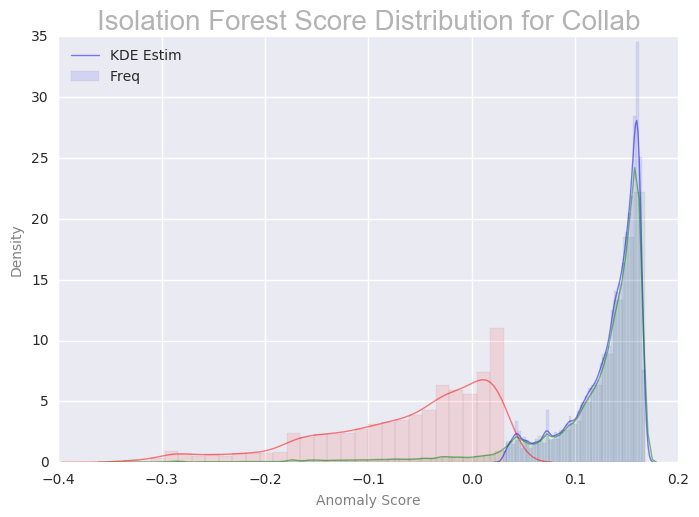

In [27]:
inlier_colla = x2_colla[x2_colla.Pred_Anom == 1]
outlier_colla = x2_colla[x2_colla.Pred_Anom == -1]

aa = sns.distplot(inlier_colla.score, kde_kws={"color":"b","lw":1,"label":"KDE Estim","alpha":0.5},
            hist_kws={"color":"b","alpha":0.1,"label":"Freq"})

ab= sns.distplot(outlier_colla.score,kde_kws={"color":"r","lw":1,"alpha":0.5},
            hist_kws={"color":"r","alpha":0.1})
ac= sns.distplot(x2_colla.score, kde_kws={"color":"g","lw":1,"alpha":0.5},
            hist_kws={"color":"g","alpha":0.1})

aa.axes.set_title('Isolation Forest Score Distribution for Collab', fontsize=20,color="black",alpha=0.3)
# Set the xlabel of the graph from here
aa.set_xlabel("Anomaly Score",size = 10,color="black",alpha=0.5)
# Set the ylabel of the graph from here
aa.set_ylabel("Density",size = 10,color="black",alpha=0.5)



In [ ]:
outlier_colla = x2_colla[x2_colla.

In [28]:
print ("Collab(Green): inliers: "+str(len(x2_colla[x2_colla.Pred_Anom == 1])))
print ("Collab(Blue): Outliers: "+str(len(x2_colla[x2_colla.Pred_Anom == -1])))



Collab(Green): inliers: 71408
Collab(Blue): Outliers: 5602


/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


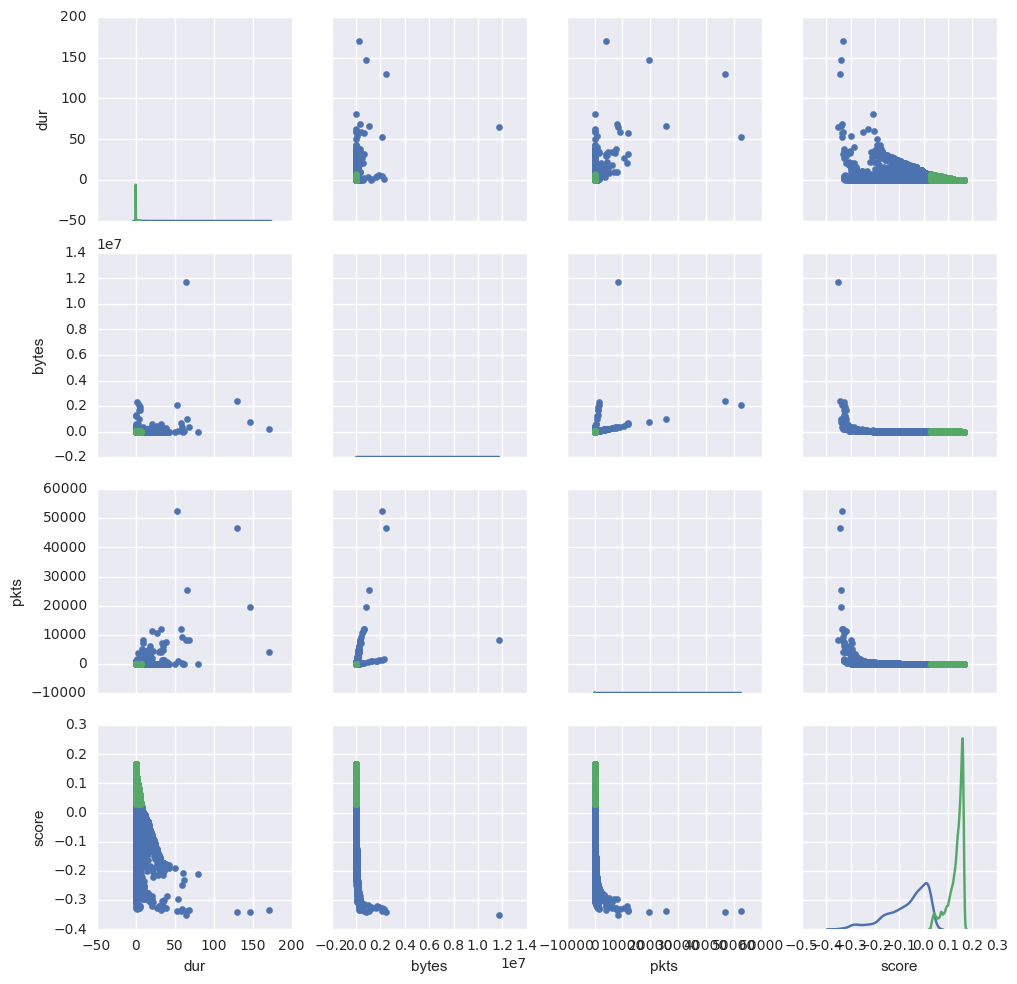

In [29]:
#g = sns.pairplot(inlier_pages, vars=["score", "dur", "bytes","pkts"])
g = sns.PairGrid(x2_colla,vars=["dur", "bytes","pkts","score"], hue="Pred_Anom")
g = g.map_diag(sns.kdeplot)
g = g.map_offdiag(plt.scatter)

/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


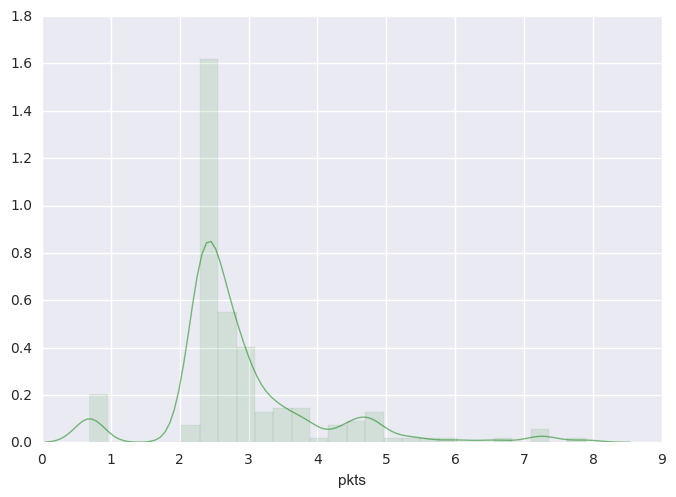

In [136]:
inlier_ece = x2_ece[x2_ece.Pred_Anom == 1]
outlier_ece= x2_ece[x2_ece.Pred_Anom == -1]

#aa = sns.distplot(inlier_ece.score, kde_kws={"color":"b","lw":1,"label":"KDE Estim","alpha":0.5},
  #          hist_kws={"color":"b","alpha":0.1,"label":"Freq"})

#ab= sns.distplot(outlier_ece.score,kde_kws={"color":"r","lw":1,"alpha":0.5},
#            hist_kws={"color":"r","alpha":0.1})
ac= sns.distplot(np.log(x2_ece.pkts), kde_kws={"color":"g","lw":1,"alpha":0.5},
            hist_kws={"color":"g","alpha":0.1})

aa.axes.set_title('Isolation Forest Score Distribution for ECE', fontsize=20,color="black",alpha=0.3)
# Set the xlabel of the graph from here
aa.set_xlabel("Anomaly Score",size = 10,color="black",alpha=0.5)
# Set the ylabel of the graph from here
aa.set_ylabel("Density",size = 10,color="black",alpha=0.5)




In [31]:
print ("ECE(Green): inliers: "+str(len(x2_ece[x2_ece.Pred_Anom == 1])))
print ("ECE(Blue): Outliers: "+str(len(x2_ece[x2_ece.Pred_Anom == -1])))



ECE(Green): inliers: 174
ECE(Blue): Outliers: 30


/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


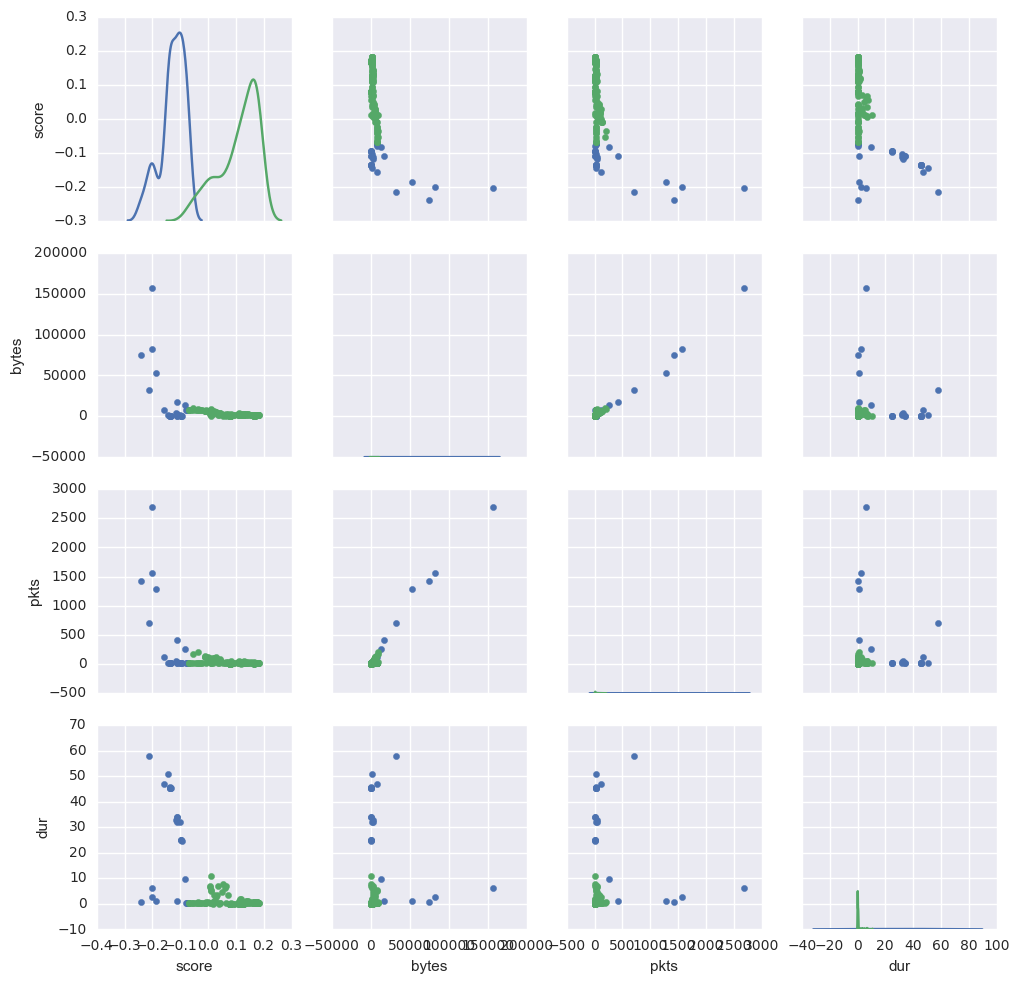

In [32]:
#g = sns.pairplot(inlier_pages, vars=["score", "dur", "bytes","pkts"])
g = sns.PairGrid(x2_ece,vars=["score", "bytes","pkts","dur"], hue="Pred_Anom")
g = g.map_diag(sns.kdeplot)
g = g.map_offdiag(plt.scatter)

In [172]:
train_colla = train_colla.astype("int16", copy=True)



In [179]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=.01).fit(train_ece)

/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/sklearn/covariance/robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (30.797971338951442 > 30.282929733943824)
  % (det, previous_det), RuntimeWarning)
/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/sklearn/covariance/robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (33.196800703760729 > 32.911430466496498)
  % (det, previous_det), RuntimeWarning)
/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/sklearn/covariance/robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (32.523471865349030 > 32.398833058395908)
  % (det, previous_det), RuntimeWarning)
/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/sklearn/covariance/robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (30.466469948587978 > 30.294364788726892)
  % (det, previous_det), RuntimeWarning)
/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/sklearn

In [180]:
test1_ee = pd.DataFrame(ee.predict(test_ece), columns = ['inlier_ee_predict'])
inlier_score_ee = pd.DataFrame(ee.decision_function(test_ece), columns = ['inlier_score_ee'])
inlier_score_ee.set_index(test_sample2_ece.index, inplace = True )







/Users/Kerry/anaconda/envs/wahoo/lib/python3.5/site-packages/sklearn/covariance/outlier_detection.py:97: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  is_inlier[values <= self.threshold_] = 1


In [183]:
test1_ee == -1 

,inlier_ee_predict
0,False
1,False
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [184]:
len(inlier_score_ee)

204

In [33]:
#Having trouble putting these side to side 
#sns.kdeplot(outlier_pages.score, np.log(outlier_pages.pkts))
#sns.kdeplot(inlier_pages.score, np.log(inlier_pages.pkts))


In [34]:
#sns.kdeplot(outlier_pages.score, np.log(outlier_pages.bytes))
#sns.kdeplot(inlier_pages.score, np.log(inlier_pages.bytes))


In [55]:
#sns.kdeplot(outlier_pages.score, outlier_pages.dur)
#sns.kdeplot(inlier_pages.score, inlier_pages.dur)

